**Text Classification -Sentiment Analysis-**

Text Classification is an automated process of classification of text into predefined categories. We can classify Emails into spam or non-spam, news articles into different categories like Politics, Stock Market, Sports, etc.



---

This can be done with the help of Natural Language Processing and different Classification Algorithms like Naive Bayes, SVM and even Neural Networks in Python


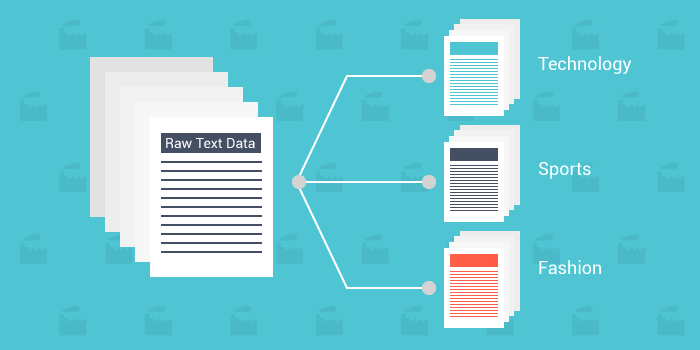

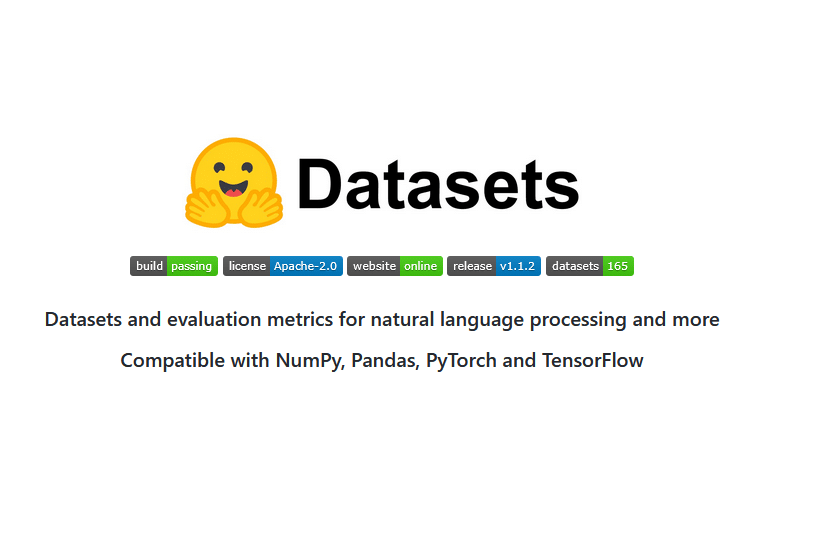

## Dataset https://huggingface.co/datasets/sst2

In [8]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 17.8 MB/s 
     |████████████████████████████████| 212 kB 50.5 MB/s 
     |████████████████████████████████| 163 kB 54.8 MB/s 
     |████████████████████████████████| 115 kB 33.0 MB/s 
     |████████████████████████████████| 95 kB 5.1 MB/s 
     |████████████████████████████████| 127 kB 55.5 MB/s 
     |████████████████████████████████| 115 kB 40.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [9]:
from datasets import load_dataset

sst2 = load_dataset('glue','sst2')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

**Dataset SST-2**

*dataset MR*: recensioni di film con una frase per recensione. La classificazione prevede l'individuazione di recensioni positive/negative (Pang e Lee, 2005).

*dataset SST-2*: Stanford Sentiment Treebank - un'estensione di MR ma con suddivisioni train/dev/test fornite e etichette a grana fine (molto positivo, positivo, neutro, negativo, molto negativo), rietichettato da Socher et al. (2013).

*dataset SST-2* come SST-1, ma con l'eliminazione delle recensioni neutre e delle etichette binarie.


In [10]:
sst2

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [11]:
import pandas as pd

df_test = pd.DataFrame(sst2['test'])
df_train = pd.DataFrame(sst2 ['train'][:10000])
df_validation = pd.DataFrame(sst2['validation'])


In [12]:
df_train.iloc[60]['sentence']
df_train.iloc[60]['label']

1

In [13]:
df_train['label'].value_counts()

1    11085
0     8915
Name: label, dtype: int64

In [14]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

**Piccolo Ripasso & Vettorizzatore usato**

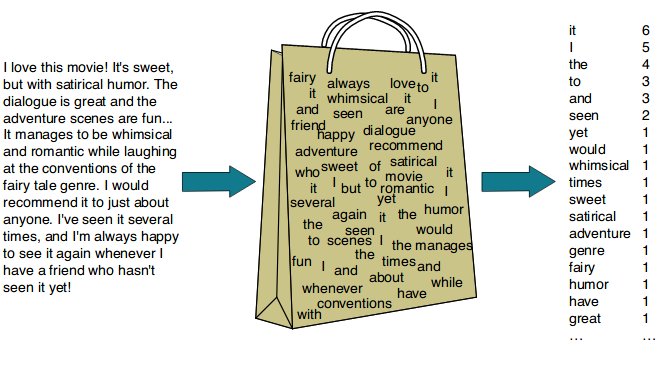

In [15]:

'''
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# Multiple documents
corpus = df_train.sentence
# create the transform
vectorizer = CountVectorizer(stop_words='english')


# tokenize and build vocab
vectorizer.fit(corpus)

# summarize
print("Vocabulary: ", vectorizer.vocabulary_)
'''

'\nimport numpy as np\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html\n\n# Multiple documents\ncorpus = df_train.sentence\n# create the transform\nvectorizer = CountVectorizer(stop_words=\'english\')\n\n\n# tokenize and build vocab\nvectorizer.fit(corpus)\n\n# summarize\nprint("Vocabulary: ", vectorizer.vocabulary_)\n'

## Studio Corpus
Studio della composizione del corpus

In [16]:
#we count the number of examples and tokens present
corpus_all_in_one = ' '.join([el for el in df_train.sentence])

print("Number of examples: {}".format(len(df_train)))
print("Number of tokens present (char): {}".format(len(corpus_all_in_one)))

Number of examples: 20000
Number of tokens present (char): 1094529


In [17]:
import nltk

#PunktSentenceTokenizer is a sentence limit detection algorithm (it can be trained) or NLTK already includes a pre-trained version of PunktSentenceTokenizer.
nltk.download('punkt')

from nltk.tokenize import word_tokenize

try: 
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of tokens: {}".format(len(all_tokens)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total number of tokens: 189274


In [18]:
from collections import Counter

# let's see the major occurrences
total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

the	8117
,	7836
a	6470
and	5942
of	5384
.	3846
to	3796
is	2620
's	2611
that	2370
in	2255
it	2182
as	1492
with	1370
film	1227
an	1207
its	1178
for	1161
movie	1053
this	1024





we need to clean up the text

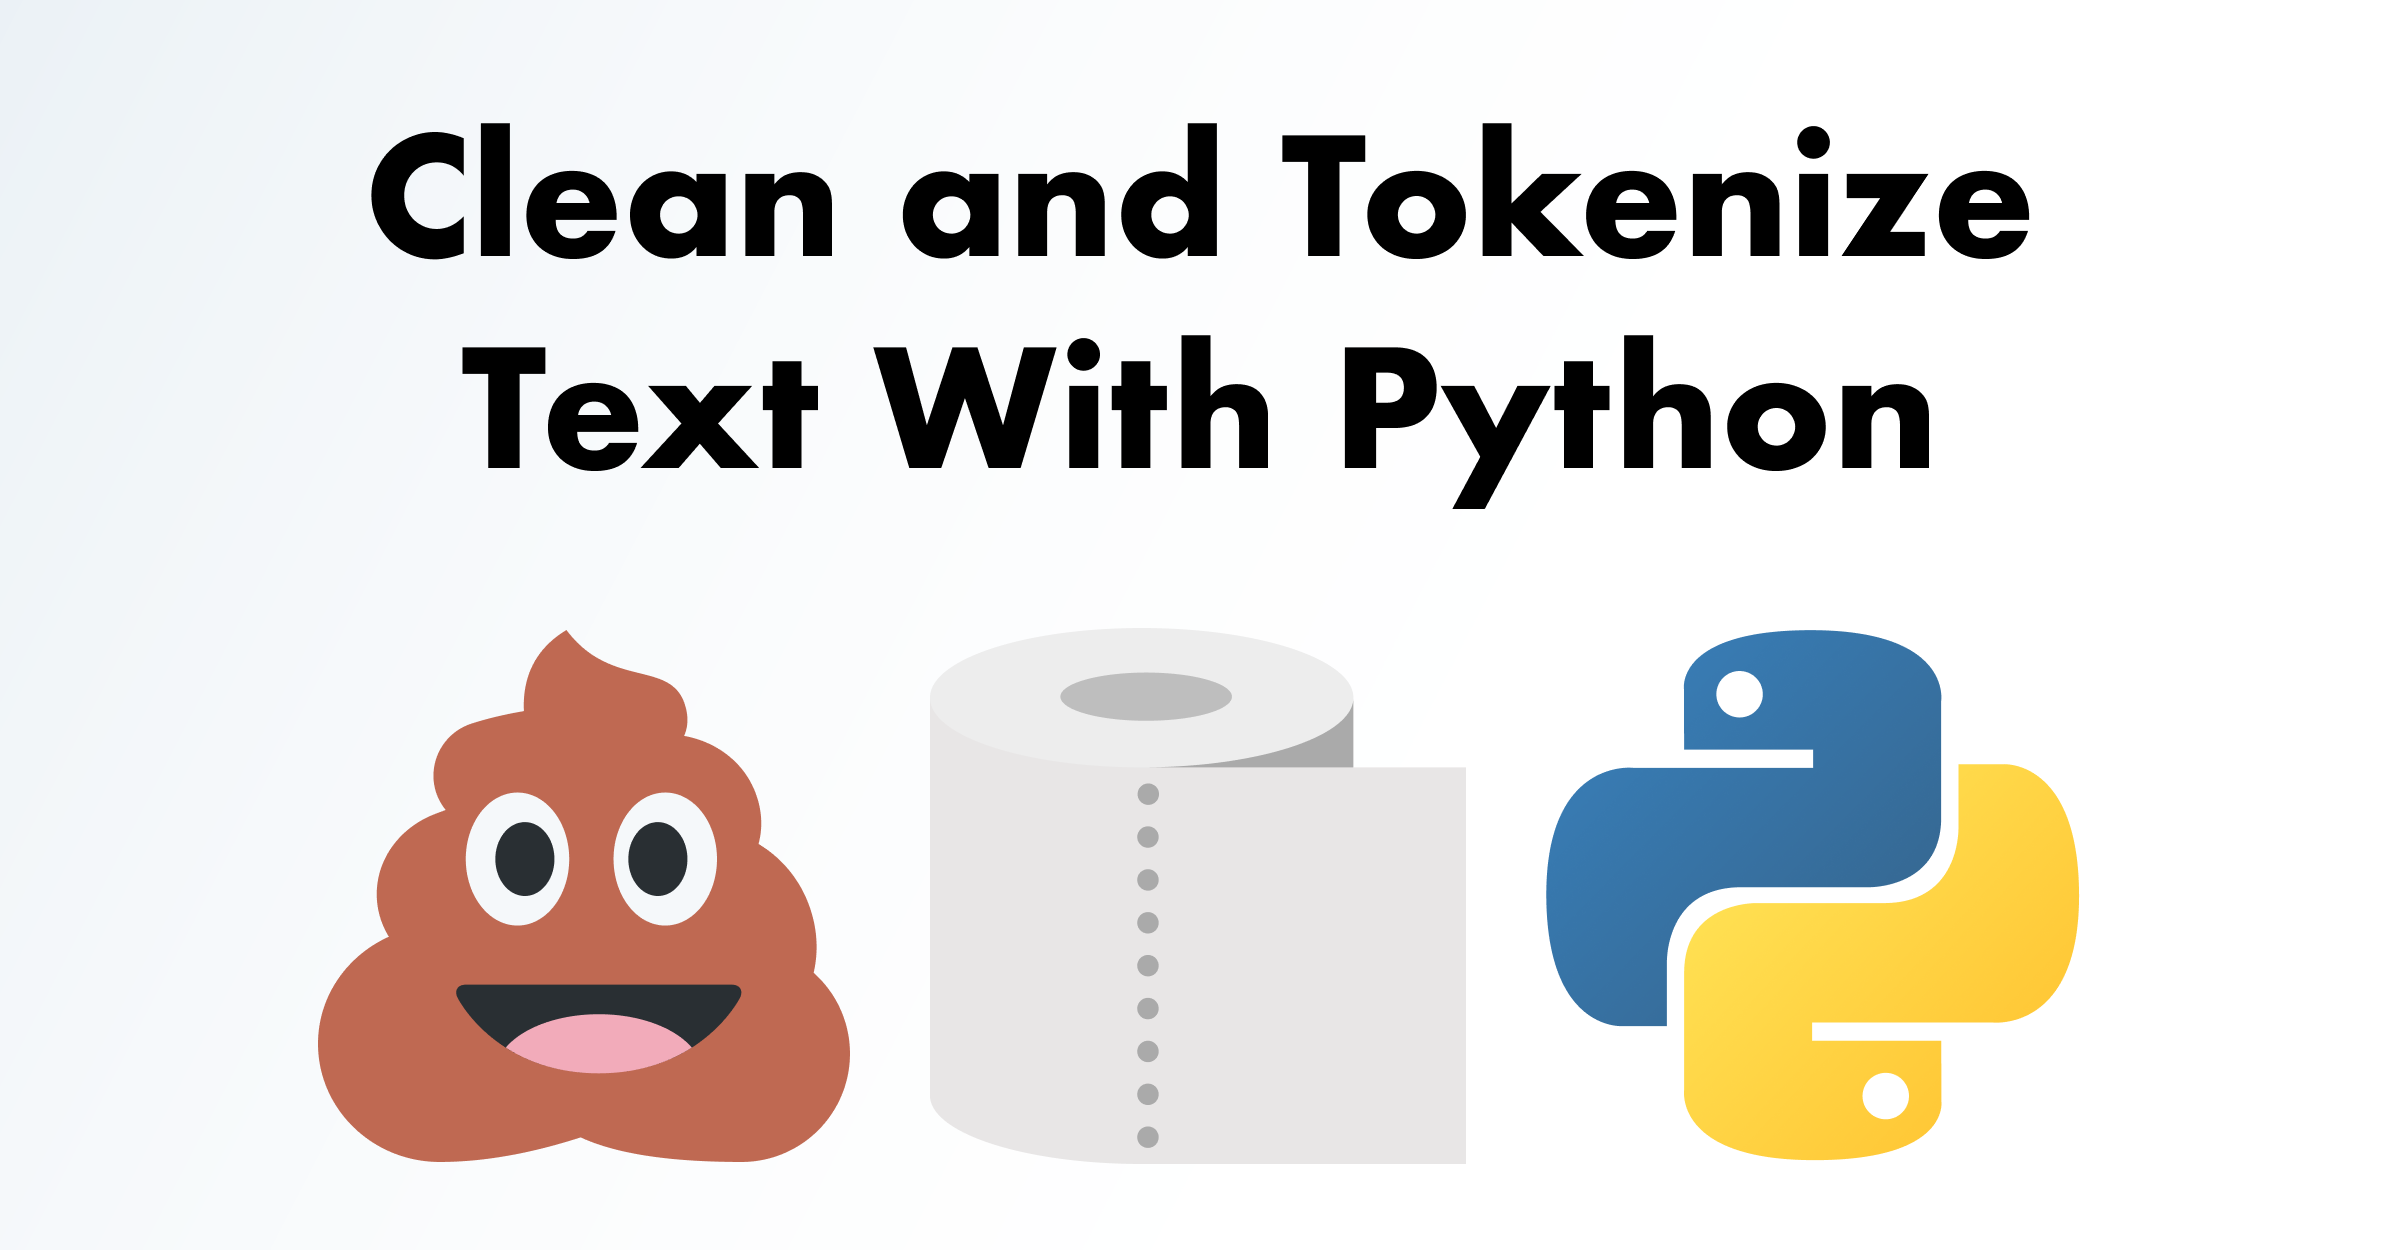

In [19]:
from nltk.corpus import stopwords
import string
import nltk


nltk.download('stopwords')


print(stopwords.words('english'))
print(len(stopwords.words('english')))
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# you can define a custom list
custom_list = ["'s","n't","''","``", "It", "This", "I"]

stop_list = stopwords.words('english') + list(string.punctuation) + custom_list

tokens_no_stop = [token for token in all_tokens if token not in stop_list]

In [21]:
# see if anything has improved
total_term_frequency_no_stop = Counter(tokens_no_stop)

for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{}\t{}".format(word, freq))

film	1227
movie	1053
--	630
one	559
like	549
good	410
story	408
...	396
comedy	340
funny	335
characters	319
much	294
even	293
little	290
time	278
bad	267
work	250
way	249
best	244
love	236


**Stemming**  Gli *Stemming* rimuovono gli affissi morfologici dalle parole, lasciando solo il word stem.

**Lemmatization** La lemmatizzazione è il processo di raggruppamento delle diverse forme inflesse di una parola in modo che possano essere analizzate come un unico elemento. La lemmatizzazione è simile alla stemmatizzazione, ma conferisce un contesto alle parole. In questo modo, collega parole con significati simili a un'unica parola.  

La pre-elaborazione del testo comprende sia la stemmatizzazione che la lemmatizzazione. Spesso i due termini vengono confusi. Alcuni li considerano la stessa cosa. In realtà, la lemmatizzazione è preferibile alla stemmatizzazione perché la lemmatizzazione effettua un'analisi morfologica delle parole.

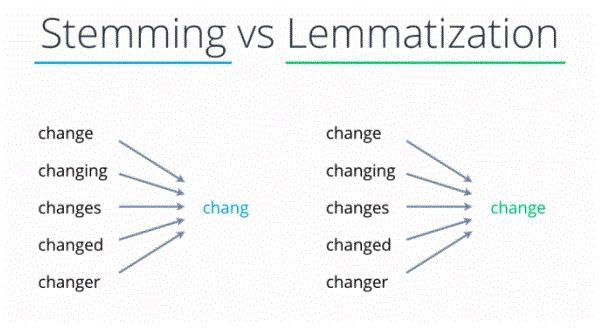

In [22]:
#Esempi:
#lowercasing
#stemming
#American-to-British mapping

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
all_tokens_lower_tokens_no_stop = [t.lower() for t in tokens_no_stop]

tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower_tokens_no_stop
                                     if t not in stop_list]

total_term_frequency_normalised = Counter(tokens_normalised)

for word, freq in total_term_frequency_normalised.most_common(20):
    print("{}\t{}".format(word, freq))

film	1421
movi	1272
--	630
like	612
one	585
make	535
charact	468
stori	445
good	418
...	396
work	390
time	385
comedi	379
funni	338
perform	333
even	312
feel	299
much	294
way	293
littl	290


In [23]:
from nltk import ngrams

phrases = Counter(ngrams(all_tokens_lower_tokens_no_stop, 2))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('romantic', 'comedy')	57
('feel', 'like')	42
('soap', 'opera')	37
('subject', 'matter')	34
('good', 'time')	32
("'ve", 'seen')	31
('love', 'story')	30
('special', 'effects')	29
('film', 'never')	27
('feels', 'like')	26
('running', 'time')	24
('big', 'screen')	24
('90', 'minutes')	23
('sense', 'humor')	23
('kind', 'movie')	21
('young', 'woman')	20
('two', 'hours')	20
('look', 'like')	20
('motion', 'picture')	20
('best', 'films')	20


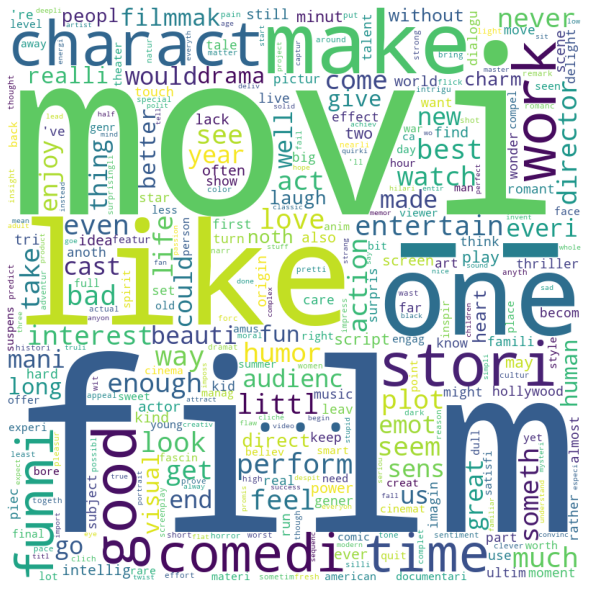

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(total_term_frequency_normalised)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [25]:
# Step - a : Remove blank rows if any.
df_train['sentence'].dropna(inplace=True)

In [26]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_train['sentence'] = [entry.lower() for entry in df_train['sentence']]

df_train['sentence'] = [token for token in df_train['sentence'] if token not in stop_list]

stemmer = PorterStemmer()

df_train['sentence'] = [stemmer.stem(t) for t in df_train['sentence'] if t not in stop_list]


In [27]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_train['sentence'],df_train['label'],test_size=0.3, random_state=500)

## Word Vectorization
È un processo di trasformazione di una collezione di documenti di testo in vettori di caratteristiche numeriche. Esistono molti metodi per convertire i dati testuali in vettori comprensibili al modello.
Oggi usiamo “Term Frequency — Inverse Document” **TF-IDF**.


*   **Frequency** che sono le componenti dei punteggi risultanti assegnati a ciascuna parola.

*   **Term Frequency:** riassume la frequenza con cui una determinata parola appare in un documento.

*  **Inverse Document Frequency**  riduce la scala delle parole che compaiono spesso nei documenti.


**TF-IDF** riduce la scala delle parole che compaiono spesso nei documenti.


In questo modo TF-IDF costruisce un vocabolario di parole che ha appreso dai dati del corpus e assegna un numero intero unico a ciascuna di queste parole. 

Ci saranno al massimo 5000 parole/caratteristiche uniche, poiché abbiamo impostato il parametro **max_features=5000**.


Infine, trasformeremo Train_X e Test_X in Train_X_Tfidf e Test_X_Tfidf vettorizzati. Questi conterranno per ogni riga un elenco di numeri interi unici e la loro importanza associata, calcolata da TF-IDF.




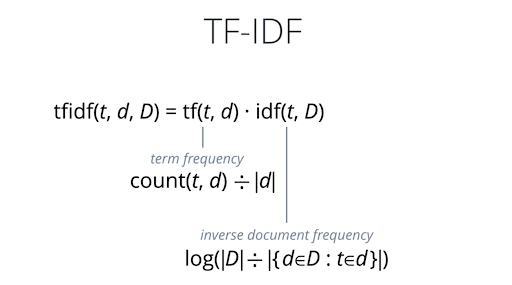

In [28]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [29]:
Train_Y

array([0, 1, 0, ..., 0, 0, 1])

In [30]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_train['sentence'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [31]:
print(Tfidf_vect.vocabulary_)

{'hide': 1979, 'new': 2930, 'from': 1745, 'the': 4450, 'no': 2947, 'wit': 4918, 'only': 3034, 'labored': 2428, 'gags': 1763, 'that': 4449, 'loves': 2605, 'its': 2308, 'characters': 689, 'and': 212, 'communicates': 834, 'something': 4083, 'rather': 3473, 'beautiful': 411, 'about': 41, 'human': 2060, 'nature': 2905, 'remains': 3574, 'utterly': 4724, 'satisfied': 3765, 'to': 4514, 'remain': 3572, 'same': 3745, 'throughout': 4493, 'on': 3030, 'worst': 4954, 'revenge': 3636, 'of': 3013, 'nerds': 2925, 'clichés': 774, 'filmmakers': 1633, 'could': 937, 'dredge': 1269, 'up': 4702, 'far': 1575, 'too': 4527, 'tragic': 4556, 'merit': 2748, 'such': 4299, 'superficial': 4323, 'treatment': 4574, 'demonstrates': 1108, 'director': 1183, 'hollywood': 2016, 'blockbusters': 485, 'as': 292, 'games': 1765, 'can': 612, 'still': 4210, 'turn': 4606, 'out': 3068, 'small': 4045, 'personal': 3170, 'film': 1629, 'with': 4920, 'an': 204, 'emotional': 1371, 'wallop': 4793, 'depressed': 1116, 'fifteen': 1620, 'year'

## Utilizziamo gli algoritmi di ML

In [32]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.85000000000001


In [33]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.36666666666667


# Esercizio


1.   Implementare il modello proposto sotituendo lo stemmer con il lemmatizzatore

2.   Confrontare perforamces CountVectorizer() e TfidfVectorizer()


3. Ottenere performances nella figura che segue.





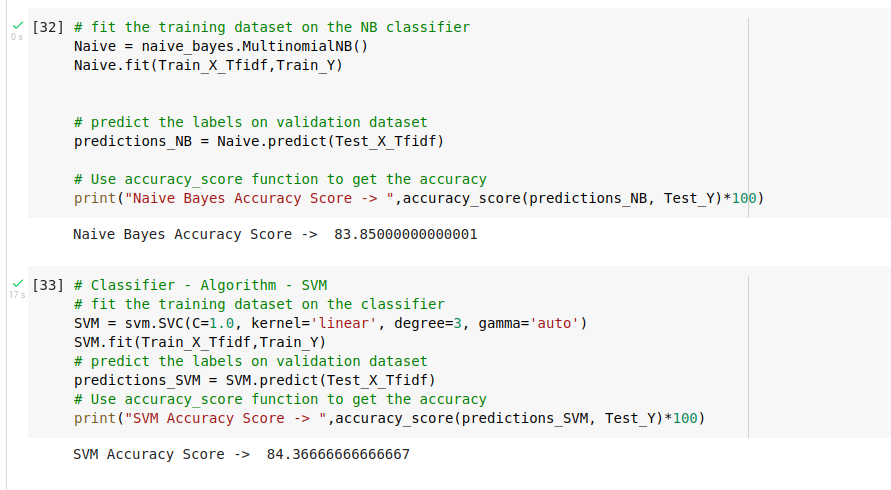

In [44]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
  
# choose some words to be stemmed
words = ["rocks", "corpora", "stemming", "swimming"]
  
for w in words:
    print(w, " : ", ps.stem(w))

rocks  :  rock
corpora  :  corpora
stemming  :  stem
swimming  :  swim


In [41]:
from nltk.stem import WordNetLemmatizer
import nltk
  
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


rocks : rock
corpora : corpus
better : good
